# Assignment 1
**Due date** October 24th, 2024.


Please fo not forget to add your names, student IDs, and emails in this file.

In [93]:
# !pip install rdkit

In [94]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks. 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [95]:
# import this additional libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles, MolToSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

# Question 1
The van der Waals equation of state is given by, 
$$
P(V,T) = \frac{RT}{V-b} - \frac{a}{V^2}
$$
where $P(V,T)$ is the pressure, $R$ is the ideal gas constant, $T$ is the temperature, $V$ is the molar volume, and $a$ and $b$ are constants.
The value of $a$ and $b$ are,
* a = 1.38169 $\frac{bar\; L^2}{mol}$
* b = 0.0387 $\frac{L}{mol}$
* 
The van der Waals equation of state is normally only used to model the gas.

## Q1.a [5 marks]
Plot $P$ vs $V$ with for an isotherm ($T=77.25K$). 
For the plot to look ``nice'' the grid must have the following properties,
1. lowest and maximum values of $V$ are, $V_{min} = 0.045 \frac{L}{mol}$, and $V_{max} = 1 \frac{L}{mol}$. 
2. the total grid must have 10,000 points
   
Create a function that computes $P$ using the van der Waals equation of state. <br>


In [96]:
# code for the grid

v_min = 0.045  # L/mol
v_max = 1  # L/mol
delta_v = 1E-5
n_points = 1000

v_grid = np.linspace(v_min+1E-6, v_max,n_points)

In [97]:
# code for P state function
def P_vanW(V,T):
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol
    
    p = (R*T/(V-b)) - (a/V**2)  # van der Waals equation of state
    return p

Text(0, 0.5, 'P')

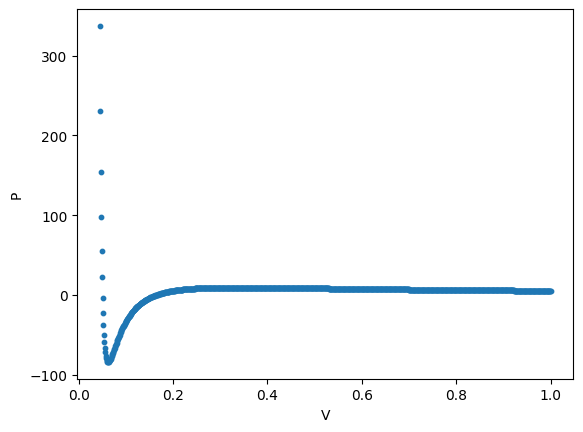

In [98]:
# code for plotting P state function
# The x-axis and y-axis must specify the name of the variables you are plotting. (marks will be deduced if you do not specify what variable is each axis)

T = 77.25
p = P_vanW(v_grid,T)
plt.scatter(v_grid, p,s=10)
plt.xlabel('V')
plt.ylabel('P')

From the fundamental equation of thermodynamics we can define the following equality, 
$$
\int_{P_1}^{P_2} V(P)\;dP = \int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV
$$

As you can see from this integral it is also necessary the computation of partial derivative of the state function P.


## Q1.b [10 marks]
Compute the partial derivative of $P(V,T)$ with respect to $V$ at $T=77.25K$ using the following numerical approximation for the derivative. <br>
**Three-point forward difference formula:**
$$
\frac{\partial f}{\partial x} \approx \frac{-3 f(x) + 4f(x+h) - f(x+2h)}{2h}
$$
where $f(x)$ is the function you want to differentiate, $x$ is the variable, and $h$ is the step size.

1. Create a python function that computes the derivative of P with respect to V using the three-point forward difference.
2. Cerate a python function that computes the analytical derivative of P with respect to V.
3. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods. 
Compare your results with the analytical solution (extra exercise for your midterm).

Verify the output of any of both functions is the same size as the grid of the input.

In [99]:
def two_point_differentiation(x, h):
    T = 77.25
    dP_l = P_vanW(x-h,T)
    dP_r = P_vanW(x+h,T)
    return (dP_r - dP_l)/(2*h)

In [100]:
def three_point_differentiation(x,h):
    # code goes here
    T = 77.25
    dP = x.copy()
    for i in range(x.shape[0]):
        dPi = -3*P_vanW(x[i], T) + 4*P_vanW(x[i]+h, T) - P_vanW(x[i] + 2*h, T)
        dP[i] = dPi
    return dP/(2*h)

$$
\frac{\partial P(V,T)}{\partial V} = \frac{2a}{V^{3}} - \frac{RT}{(V-b)^2}
$$

In [101]:
# partial derivative of P with respect to V at constant T
def dP_dV(V,T):
    # code goes here
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol
    
    dP = -(R * T) / (V - b)**2 + (2 * a) / V**3

    return dP 

In [102]:
# value the Frobenius norm of the difference of the derivative compute with three-point forward difference and the analytical derivative.

# code here
print(v_grid.shape)
h = v_grid[1] - v_grid[0]
dP_numeric = three_point_differentiation(v_grid,h)
print(dP_numeric.shape)
dP_analytical = dP_dV(v_grid, T)
print(dP_analytical.shape)

F_norm = np.linalg.norm(dP_numeric - dP_analytical)
print('The Frobenius norm is', F_norm)

(1000,)
(1000,)
(1000,)
The Frobenius norm is 6232.899749440031


Text(0, 0.5, '$\\frac{\\partial P(V,T)}{\\partial V}$')

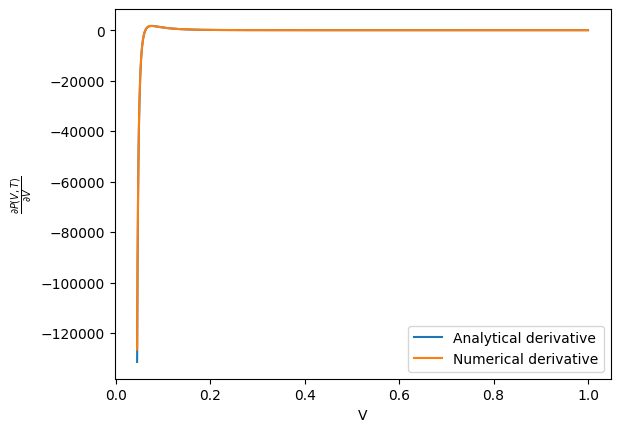

In [103]:
plt.plot(v_grid,dP_analytical,label = 'Analytical derivative')
plt.plot(v_grid, dP_numeric, label='Numerical derivative')
plt.legend()
plt.xlabel('V')
plt.ylabel(r'$\frac{\partial P(V,T)}{\partial V}$')

## Q1.c numerical integration

In class we saw that the integral of a function can be approximated using the sum of the integrand.<br>
**Composite Three-Point Trapezoidal Rule:**
For a uniform grid where $h$ is the spacing between consecutive points, the composite three-point trapezoidal rule can be written as,
$$
\int_{a}^{b} f(x) dx = \frac{h}{4} \sum_{i=0}^{N-3} \left (f(x_i) + 2f(x_{i+1}) + f(x_{i+2}) \right )
$$
where $N$ is the number of grid points. 

1. Create a python function for the three-point trapezoidal rule for numerical integration.
2. Cerate a python function that computes the analytical integration of $\int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV$ for different values of $V_1$ and $V_2$ and T.
3. Compare your three-point trapezoidal rule function for this example with the analytical number.
4. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods. 
Compare your results with the analytical solution (extra exercise for your midterm).

In [104]:
def three_point_trapezoidal_rule(x,h):
    # code here
    T = 77.25
    f = P_vanW(x,T)
    N = x.shape[0]
    integral = 0
    for i in range(N-3):
        integral += (f[i] + 2*f[i+1] + f[i+2])
    
    integral = (h/4.) * integral
    return integral


In [105]:
def two_point_trapezoidal_rule(x, h):
    
    T = 77.25
    y = P_vanW(x,T)
    N = x.shape[0]
    
    int_value = y[0]*(h/2) + y[-1]*(h/2)
    for yi in y[:-1]:
        int_value += yi*h
    return int_value

In [109]:
# function that computes the analytical integral of int V (dP/dV)_T 
def analytical_integral(V_min,V_max):
    
    # code here
    T = 77.25
    R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
    a = 1.38169  # bar L^2/mol
    b = 0.0387  # L/mol   
    
    def integral_(Vi):
        integral_i = -(2*a)/(Vi) - (b*R*T)/(b-Vi) - R*T*np.log(np.abs(b-Vi))
        return integral_i
    
    integral = integral_(V_max) - integral_(V_min)
    return integral

# def analytical_integral(V_min, V_max, T):
#     R = 8.314  # L⋅bar⋅K−1⋅mol−1
#     a = 1.38169  # bar L^2/mol
#     b = 0.0387  # L/mol

#     integral = -R*T*np.log(np.abs((V_max-V_min-b))) + \
#         (R*T*b/(V_max-V_min-b)) - (2*a)/(V_max-V_min)
#     return integral

In [111]:
v_min = 0.045  # L/mol
v_max = 1  # L/mol

h = v_grid[1] - v_grid[0]
# 
int_numeric = two_point_trapezoidal_rule(v_grid, h)
print(int_numeric)

T = 77.25
R = 0.0831446261815324  # L⋅bar⋅K−1⋅mol−1
a = 1.38169  # bar L^2/mol
b = 0.0387  # L/mol   
print(b)
print(v_min)



int_numeric = three_point_trapezoidal_rule(v_grid, h)
print(int_numeric)

int_analytic = analytical_integral(v_min, v_max)
print(int_analytic)

3.30209494766957
0.0387
0.045
2.8365416369308396
-12.844220052574856


In [108]:
assert 0

AssertionError: 

# Q3 Tanimoto similarity function [10marks]

Later in class we will see that a molecule can be represented numerically using a **finger prints** representation. This numerical vector is used describe each individual molecule,
for example for the molecule of caffeine, 


In [18]:
def get_fingerprints(m_smiles, radius=2, nbits=2048):
  m = AllChem.MolFromSmiles(m_smiles)
  m = AllChem.AddHs(m)
  m_fingerprints = AllChem.GetMorganFingerprintAsBitVect(
      m, radius=radius, nBits=nbits)
  return np.asarray(m_fingerprints)

Now, suppose you have a database of 5,000 molecules.<br>
To find the similarity of the caffeine molecule with the database. <br>
You would calculate the **Tanimoto similarity** between each molecule in the database and the caffeine molecule.<br>


**Tanimoto similarity**
$$
TS(\mathbf{x}, \mathbf{x}') = \frac{\mathbf{x}^\top\mathbf{x}'}{\|\mathbf{x}\|^2 + \|\mathbf{x}'\|^2 - \mathbf{x}^\top\mathbf{x}'},
$$
where
* $\mathbf{x}$ is the fingerprint representation of a molecule
* $\mathbf{x}^\top\mathbf{x}'$ is the dot product between two molecules' fingerprint representation
* $\|\mathbf{x}\|^2$ is the square norm of the fingerprint representation; $\|\mathbf{x}\|^2 = \sum_i^n x_i^2$

1. Two structures are usually considered similar if $TS > 0.85$.
From the database, how many molecules are similar to the caffeine molecule?
1. Plot a histogram of the Tanimoto similarity between each molecule in the database and the caffeine molecule. The histogram must have 200 bins.
2. What is the less similar molecule to caffeine.
3. What is the average Tanimoto similarity between each molecule in the database and caffeine? 

In [23]:
def tanimoto_similarity(fp_molecule1, fp_molecule2):
    # code here to calculate the Tanimoto similarity
    
    x = fp_molecule1
    xp = fp_molecule2
    
    x_norm = x@x
    xp_norm = xp@xp
    dot_product = x@xp
    
    value = dot_product / (x_norm + xp_norm - dot_product)
    return value

[0 0 0 ... 0 0 0]
1.0


[08:02:19] DEPRECATION WARNING: please use MorganGenerator


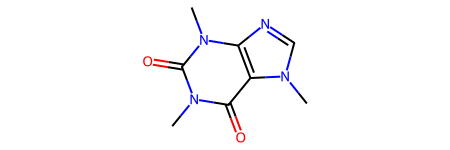

In [33]:
# caffeine molecule
smiles_caff = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
# get the fingerprint representation of caffeine molecule
x_caff = get_fingerprints(smiles_caff)
print(x_caff)


# template for plotting the molecule
m = AllChem.MolFromSmiles(smiles_caff)
m

In [25]:
#load the database
data_file = 'https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Assigments/solubility.csv'
data = pd.read_csv(data_file)
data = data['SMILES']
print('Total data points: ',len(data))

Total data points:  9982


In [34]:
# note you will get an error that says DEPRECATION WARNING: please use MorganGenerator, do not worry!

similarities = np.zeros(len(data)) # vector to store the similarity between data and caffeine
for i, si in enumerate(data):
    # get the fingerprint representation of each molecule in the database
    x_i = get_fingerprints(si)

    # calculate the Tanimoto similarity between the caffeine molecule and each molecule in the database
    ts_i = tanimoto_similarity(x_i,x_caff)
    
    # add the similarity to a list
    similarities[i] = ts_i

[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerator
[08:02:33] DEPRECATION WARNING: please use MorganGenerat

In [52]:
i0 = np.where(similarities>0.85)
print('Number of similar molecules: ',len(i0[0]))

Number of similar molecules:  1


Text(0.5, 0, 'Tanimoto Similarity')

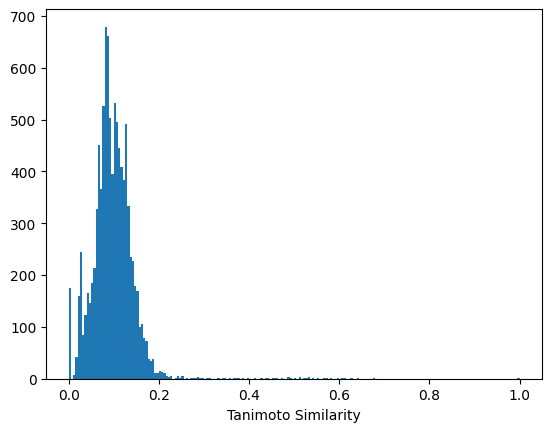

In [35]:
# plot the histogram of the Tanimoto similarity here
# make the necessary adjustments to make the plot prettier 

plt.hist(similarities,bins=200)
plt.xlabel('Tanimoto Similarity')

Less similar molecule: N#N
More similar molecule: C[N]1C=NC2=C1C(=O)N(C)C(=O)N2C


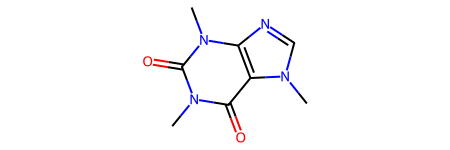

In [39]:
# average of the similarity

# maximum and minimum value of the TS. You can get the molecule in the database using
# np.argsort(similarities) Check the Numpy documentation. 

i0 = np.argsort(similarities) # index of the sorted molecules, from minimum to maximum
i_min = i0[0]
i_max = i0[-1]

print('Less similar molecule:', data.iloc[i_min])
s_min = data.iloc[i_min]
print('More similar molecule:', data.iloc[i_max])
s_max = data.iloc[i_max]


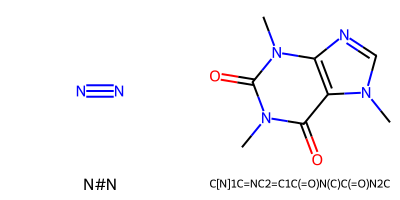

In [45]:
s_ = [s_min, s_max]
ms_ = [Chem.MolFromSmiles(smi) for smi in s_]

Draw.MolsToGridImage(ms_,molsPerRow=2,subImgSize=(200,200),legends=[x for x in s_])    

In [ ]:
# Extra guide for plotting molecules. 

# The database's first molecule is 

s0 = data.iloc[0]
print(s0)
m0 = AllChem.MolFromSmiles(s0)
m0



In [ ]:
# the 10th molecule is,
s0 = data.iloc[10]
print(s0)
m0 = AllChem.MolFromSmiles(s0)
m0